In [2]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.vq import whiten, kmeans2

%matplotlib inline

In [16]:
def call_api(uri, result_key):
    json = {}
    try:
        json = requests.get(uri, headers = { 'X-Auth-Token': 'a4edd69781fc42749b4b3f5154d70b1d' }).json()
        return json[result_key]
    except:
        print(json)
        return None

In [5]:
leagues = requests.get('http://api.football-data.org/v1/soccerseasons', headers = { 'X-Auth-Token': 'c52b7825851b4357af3e06c1888152f0' }).json()

In [10]:
leagues[8]

{'_links': {'fixtures': {'href': 'http://api.football-data.org/v1/soccerseasons/452/fixtures'},
  'leagueTable': {'href': 'http://api.football-data.org/v1/soccerseasons/452/leagueTable'},
  'self': {'href': 'http://api.football-data.org/v1/soccerseasons/452'},
  'teams': {'href': 'http://api.football-data.org/v1/soccerseasons/452/teams'}},
 'caption': '1. Bundesliga 2017/18',
 'currentMatchday': 24,
 'id': 452,
 'lastUpdated': '2018-02-26T20:00:53Z',
 'league': 'BL1',
 'numberOfGames': 306,
 'numberOfMatchdays': 34,
 'numberOfTeams': 18,
 'year': '2017'}

In [17]:
teams = call_api('http://api.football-data.org/v1/soccerseasons/452/teams', 'teams')
teams

[{'_links': {'fixtures': {'href': 'http://api.football-data.org/v1/teams/5/fixtures'},
   'players': {'href': 'http://api.football-data.org/v1/teams/5/players'},
   'self': {'href': 'http://api.football-data.org/v1/teams/5'}},
  'code': 'FCB',
  'crestUrl': 'https://upload.wikimedia.org/wikipedia/en/1/1b/FC_Bayern_München_logo_(2017).svg',
  'name': 'FC Bayern München',
  'shortName': 'Bayern',
  'squadMarketValue': None},
 {'_links': {'fixtures': {'href': 'http://api.football-data.org/v1/teams/3/fixtures'},
   'players': {'href': 'http://api.football-data.org/v1/teams/3/players'},
   'self': {'href': 'http://api.football-data.org/v1/teams/3'}},
  'code': 'B04',
  'crestUrl': 'https://upload.wikimedia.org/wikipedia/en/5/59/Bayer_04_Leverkusen_logo.svg',
  'name': 'Bayer Leverkusen',
  'shortName': 'Leverkusen',
  'squadMarketValue': None},
 {'_links': {'fixtures': {'href': 'http://api.football-data.org/v1/teams/7/fixtures'},
   'players': {'href': 'http://api.football-data.org/v1/teams

In [19]:
for team in teams:
    players = call_api(team['_links']['players']['href'], 'players')
    fixtures = call_api(team['_links']['fixtures']['href'], 'fixtures')
    qt_german_players = 0
    for player in players:
        qt_german_players += 1 if player['nationality'] == 'Germany' else 0
    goals = 0
    matches = 0
    wins = 0
    losses = 0
    draws = 0
    for f in fixtures:
        if f['status'] == 'FINISHED':
            matches += 1
            if team['name'] == f['homeTeamName']:
                goals += f['result']['goalsHomeTeam'] if f['result']['goalsHomeTeam'] else 0
                wins += 1 if f['result']['goalsHomeTeam'] > f['result']['goalsAwayTeam'] else 0
                losses += 1 if f['result']['goalsHomeTeam'] < f['result']['goalsAwayTeam'] else 0
                draws += 1 if f['result']['goalsHomeTeam'] == f['result']['goalsAwayTeam'] else 0
            elif team['name'] == f['awayTeamName']:
                goals += f['result']['goalsAwayTeam'] if f['result']['goalsAwayTeam'] else 0
                wins += 1 if f['result']['goalsAwayTeam'] > f['result']['goalsHomeTeam'] else 0
                losses += 1 if f['result']['goalsAwayTeam'] < f['result']['goalsHomeTeam'] else 0
                draws += 1 if f['result']['goalsAwayTeam'] == f['result']['goalsHomeTeam'] else 0
    print('Team "{}", {} players, {} native german players, {} goals, {} matches, {} wins, {} losses, {} draws'.
          format(team['name'], len(players), qt_german_players, goals, matches, wins, losses, draws))
    team['players'] = players
    team['german_players'] = qt_german_players
    team['goals'] = goals
    team['matches'] = matches
    team['wins'] = wins
    team['losses'] = losses
    team['draws'] = draws

Team "FC Bayern München", 27 players, 13 native german players, 87 goals, 35 matches, 28 wins, 3 losses, 4 draws
Team "Bayer Leverkusen", 23 players, 13 native german players, 52 goals, 28 matches, 13 wins, 6 losses, 9 draws
Team "Hamburger SV", 29 players, 16 native german players, 19 goals, 25 matches, 4 wins, 16 losses, 5 draws
Team "FC Augsburg", 24 players, 11 native german players, 32 goals, 24 matches, 8 wins, 9 losses, 7 draws
Team "Hertha BSC", 27 players, 15 native german players, 33 goals, 26 matches, 8 wins, 8 losses, 10 draws
Team "VfB Stuttgart", 26 players, 14 native german players, 26 goals, 27 matches, 10 wins, 13 losses, 4 draws
Team "TSG 1899 Hoffenheim", 27 players, 14 native german players, 42 goals, 28 matches, 9 wins, 11 losses, 8 draws
Team "Werder Bremen", 30 players, 13 native german players, 31 goals, 28 matches, 9 wins, 11 losses, 8 draws
Team "1. FSV Mainz 05", 25 players, 11 native german players, 38 goals, 28 matches, 9 wins, 13 losses, 6 draws
Team "Hann

In [20]:
team_for_pd = []
for team in teams:
    if team['players']:
        team_for_pd.append({'name': team['name'],
                            'players': len(team['players']), 'german_players': team['german_players'],
                            'goals': team['goals'],
                            'matches': team['matches'], 
                            'wins': team['wins'], 'losses': team['losses'], 'draws': team['draws']})
team_for_pd

[{'draws': 4,
  'german_players': 13,
  'goals': 87,
  'losses': 3,
  'matches': 35,
  'name': 'FC Bayern München',
  'players': 27,
  'wins': 28},
 {'draws': 9,
  'german_players': 13,
  'goals': 52,
  'losses': 6,
  'matches': 28,
  'name': 'Bayer Leverkusen',
  'players': 23,
  'wins': 13},
 {'draws': 5,
  'german_players': 16,
  'goals': 19,
  'losses': 16,
  'matches': 25,
  'name': 'Hamburger SV',
  'players': 29,
  'wins': 4},
 {'draws': 7,
  'german_players': 11,
  'goals': 32,
  'losses': 9,
  'matches': 24,
  'name': 'FC Augsburg',
  'players': 24,
  'wins': 8},
 {'draws': 10,
  'german_players': 15,
  'goals': 33,
  'losses': 8,
  'matches': 26,
  'name': 'Hertha BSC',
  'players': 27,
  'wins': 8},
 {'draws': 4,
  'german_players': 14,
  'goals': 26,
  'losses': 13,
  'matches': 27,
  'name': 'VfB Stuttgart',
  'players': 26,
  'wins': 10},
 {'draws': 8,
  'german_players': 14,
  'goals': 42,
  'losses': 11,
  'matches': 28,
  'name': 'TSG 1899 Hoffenheim',
  'players': 27,

In [21]:
teams_pd = pd.DataFrame(team_for_pd)
teams_pd

,draws,german_players,goals,losses,matches,name,players,wins
0,4,13,87,3,35,FC Bayern München,27,28
1,9,13,52,6,28,Bayer Leverkusen,23,13
2,5,16,19,16,25,Hamburger SV,29,4
3,7,11,32,9,24,FC Augsburg,24,8
4,10,15,33,8,26,Hertha BSC,27,8
5,4,14,26,13,27,VfB Stuttgart,26,10
6,8,14,42,11,28,TSG 1899 Hoffenheim,27,9
7,8,13,31,11,28,Werder Bremen,30,9
8,6,11,38,13,28,1. FSV Mainz 05,25,9
9,8,15,38,9,26,Hannover 96,26,9


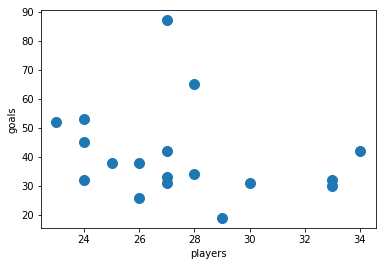

In [27]:
teams_pd.plot.scatter(x='players', y='goals', s=100)

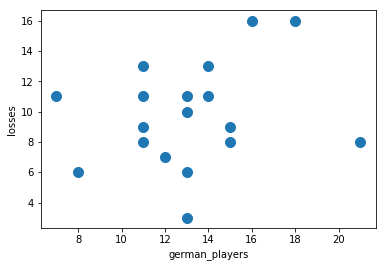

In [23]:
teams_pd.plot.scatter(x='german_players', y='losses', s=100)

In [24]:
teams_pd['german_players_share'] = round(teams_pd['german_players'] / teams_pd['players'], 2)
teams_pd['losses_share'] = round(teams_pd['losses'] / teams_pd['matches'], 2)
teams_pd

,draws,german_players,goals,losses,matches,name,players,wins,german_players_share,losses_share
0,4,13,87,3,35,FC Bayern München,27,28,0.48,0.09
1,9,13,52,6,28,Bayer Leverkusen,23,13,0.57,0.21
2,5,16,19,16,25,Hamburger SV,29,4,0.55,0.64
3,7,11,32,9,24,FC Augsburg,24,8,0.46,0.38
4,10,15,33,8,26,Hertha BSC,27,8,0.56,0.31
5,4,14,26,13,27,VfB Stuttgart,26,10,0.54,0.48
6,8,14,42,11,28,TSG 1899 Hoffenheim,27,9,0.52,0.39
7,8,13,31,11,28,Werder Bremen,30,9,0.43,0.39
8,6,11,38,13,28,1. FSV Mainz 05,25,9,0.44,0.46
9,8,15,38,9,26,Hannover 96,26,9,0.58,0.35


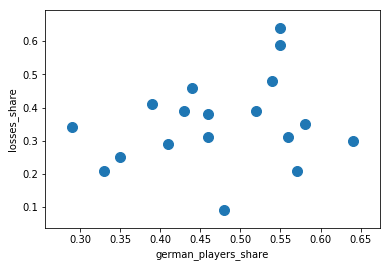

In [25]:
teams_pd.plot.scatter(x='german_players_share', y='losses_share', s=100)

In [26]:
teams_pd[['german_players_share', 'losses_share']]

,german_players_share,losses_share
0,0.48,0.09
1,0.57,0.21
2,0.55,0.64
3,0.46,0.38
4,0.56,0.31
5,0.54,0.48
6,0.52,0.39
7,0.43,0.39
8,0.44,0.46
9,0.58,0.35


In [29]:
whitened = whiten(teams_pd[['german_players_share', 'losses_share']].as_matrix())
whitened

array([[5.12247963, 0.69248477],
       [6.08294456, 1.61579779],
       [5.86950791, 4.92433614],
       [4.90904298, 2.92382458],
       [5.97622623, 2.38522532],
       [5.76278958, 3.6932521 ],
       [5.54935293, 3.00076733],
       [4.588888  , 3.00076733],
       [4.69560633, 3.5393666 ],
       [6.18966288, 2.69299632],
       [4.37545135, 2.23133981],
       [4.90904298, 2.38522532],
       [3.52170474, 1.61579779],
       [3.09483144, 2.61605357],
       [6.82997284, 2.30828256],
       [3.73514139, 1.9235688 ],
       [4.1620147 , 3.15465284],
       [5.86950791, 4.53962238]])

In [30]:
centroids, cluster_map = kmeans2(whitened, 3)
centroids, cluster_map

(array([[5.60271209, 1.15414128],
        [6.00671718, 3.36349745],
        [4.22130266, 2.59895518]]),
 array([0, 0, 1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1], dtype=int32))

In [31]:
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]
colors

['r',
 'r',
 'g',
 'b',
 'g',
 'g',
 'g',
 'b',
 'b',
 'g',
 'b',
 'b',
 'b',
 'b',
 'g',
 'b',
 'b',
 'g']

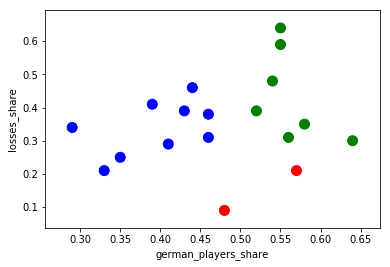

In [34]:
teams_pd.plot.scatter(x='german_players_share', y='losses_share', c=colors, s=100)

In [35]:
centroids, cluster_map = kmeans2(whitened, 5)
centroids, cluster_map

(array([[5.54935293, 4.1741443 ],
        [5.12247963, 0.69248477],
        [3.91300527, 2.42369669],
        [5.5066656 , 2.67760777],
        [6.4564587 , 1.96204018]]),
 array([1, 4, 0, 3, 3, 0, 3, 2, 0, 3, 2, 3, 2, 2, 4, 2, 2, 0], dtype=int32))

In [36]:
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]
colors

['g',
 'm',
 'r',
 'y',
 'y',
 'r',
 'y',
 'b',
 'r',
 'y',
 'b',
 'y',
 'b',
 'b',
 'm',
 'b',
 'b',
 'r']

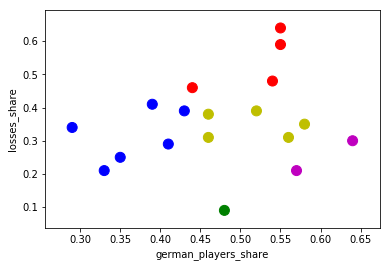

In [38]:
teams_pd.plot.scatter(x='german_players_share', y='losses_share', c=colors, s=100)

In [39]:
for i in range(0, 17):
    if colors[i] == 'm':
        print(teams_pd['name'][i])
    i += 1

Bayer Leverkusen
SC Freiburg


In [40]:
for i in range(0, 17):
    if colors[i] == 'b':
        print(teams_pd['name'][i])
    i += 1

Werder Bremen
VfL Wolfsburg
FC Schalke 04
Red Bull Leipzig
Eintracht Frankfurt
Bor. Mönchengladbach
